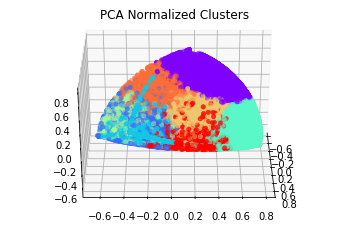

In [17]:
import pandas as pd, numpy as np, random
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Read csv into data frame. 
df = pd.read_csv('data/transcript_level/DC30_green-deduped_data.csv')

# Keep only relevant columns in the data frame.
df = df[['meanTPM_T0','meanTPM_T1','meanTPM_T2','meanTPM_T3']]

# Remove rows that have missing values and/or infinite values. 
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Convert everying to doubles. 
df = df.astype('double')

# normalize data
df_pre = preprocessing.normalize(df, norm='l2')

df_pre = pd.DataFrame(data=df_pre,columns=["meanTPM_T0", "meanTPM_T1", "meanTPM_T2", "meanTPM_T3"])

# Use PCA to reduce dimensions from 4 --> 3 for better clusterng
pca = PCA(n_components = 3)
pca.fit(df_pre)
var = pca.explained_variance_ratio_

var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

df_pca = pca.fit_transform(df_pre)
df_pca = pd.DataFrame(data=df_pca, columns = ["feature1", "feature2", "feature3"])

# Kmeans using 6 clusters --> probably need to develop some rationale for determining which clusters were best

x = df_pca.iloc[:, [0,1,2]].values #features


# creates clusters and returns predictions
def kmeans_clusters(num_clusters, x_train): 
    
    kmeans6 = KMeans(n_clusters=num_clusters)
    y_kmeans6 = kmeans6.fit_predict(x_train)

    kmeans6.cluster_centers_
    
    return y_kmeans6

preds = kmeans_clusters(8, x)

#calculates WSS error to determine optimal number of clusters
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

# Plot Clustered PCA Normalized Data 
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=preds, cmap='rainbow', linewidth=0.5)
ax.set_title("PCA Normalized Clusters")

ax.view_init(30, 0)

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)



{0: 5640, 1: 8676, 2: 3645, 3: 3441, 4: 12569, 5: 4788, 6: 3197, 7: 2597}


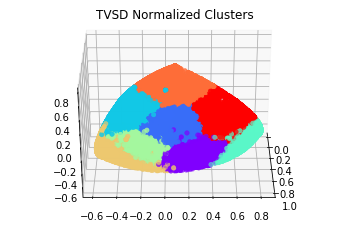

In [18]:
from sklearn.decomposition import TruncatedSVD


#still want to normalize the data
df_pre = preprocessing.normalize(df, norm='l2')

df_pre = pd.DataFrame(data=df_pre,columns=["meanTPM_T0", "meanTPM_T1", "meanTPM_T2", "meanTPM_T3"])

#dimensionality reduction to 3 dimensionsm, this time using TruncatedSVD
svd = TruncatedSVD(3)

df_svd_transformed = svd.fit_transform(df_pre)
df_svd_transformed = pd.DataFrame(data=df_svd_transformed, columns = ["feature1SVD", "feature2SVD", "feature3SVD"])

#get features
x = df_svd_transformed.iloc[:, [0,1,2]].values


# Error values from calculate_WSS() on svd normalized data 
WSS_results = [5619.463202887011, 
               2484.0948291293676, 2353.9475276522066, 
               1585.6521224712533, 1338.3686414217966, 
               1193.291545225528, 1029.6605641298447, 
               843.1568264411025, 767.0978453878181, 
               693.5268803227341, 632.1275218276015, 
               590.3644194928218, 567.6290054545116,
               519.8905158148397, 497.1722215483842, 
               438.8697014194186, 405.6535688531619, 
               389.41337568974365, 353.75886176357164,
               341.9557826355695, 333.30224044645206, 
               317.3036584560711, 304.3424951899456, 
               294.842790088301, 282.5441019273827, 
               270.16621090431266, 258.2203248216182,
               249.90121386476028, 241.8046262037041, 
               236.30965423318847, 232.9445218688999, 
               223.32123257446443, 218.09025413075017, 
               214.36702012474927, 205.87548283627993, 
               200.35991819857875, 195.8127184348325, 
               189.69976444360347, 187.6211096557506, 
               179.119739483089, 179.103217364143, 
               176.16220789883266, 167.71092536050736, 
               165.92950419670078, 161.73451664015366, 
               156.31648649758142, 151.95692879244783, 
               153.58195170267436, 148.35541159909158, 
               147.49456939814448, 143.43245079770134, 
               137.92456215426492, 137.16782973564196, 
               137.1876651644849, 133.64561869156546, 
               133.25632686138164, 130.0481820816612, 
               126.72489615379506, 127.16556544462757, 
               125.34732822288268, 126.15952417995756, 
               122.11706205591601, 119.41606369479004, 
               116.97293704431964, 118.66293029312438, 
               115.23935510876163, 114.57517728618573, 
               110.07787196159508, 110.26810827926082, 
               112.21540763990467, 106.58698186999496, 
               104.66509076918847, 106.13928454341873, 
               104.1716698350809, 102.71132678039987, 
               101.05913373316164, 102.35909842754596, 
               97.44685260600248, 95.91168378752484, 
               93.90556609944501, 95.23279959904949]


# plt.plot(WSS_results)
# plt.show()

# results = calculate_WSS(x, 10) 
# print (results)
# plt.plot(results)
# plt.show

# WSS results plot showed 8 to be optimal 
svd_preds = kmeans_clusters(8, x)

# Plot Clustered TSVD Normalized Data
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=svd_preds, cmap='rainbow', linewidth=0.5);
ax.set_title("TVSD Normalized Clusters")

ax.view_init(30, 0)

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
             
unique, counts = np.unique(svd_preds, return_counts = True)
print (dict(zip(unique, counts)))



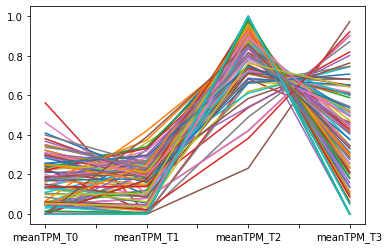

In [4]:

# Plot gene expression over time for each cluster

def plot_cluster(cluster, preds):
    clustered_df = df_pre
    clustered_df["ids"] = preds
    clustered_df = clustered_df[clustered_df["ids"] == cluster]
    clustered_df = clustered_df.drop("ids", axis = 1) 

    for index, row in clustered_df.head(100).iterrows():
        row.plot.line()

    
plot_cluster(0, svd_preds)



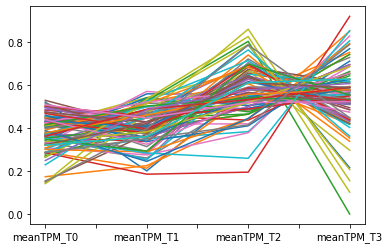

In [5]:
plot_cluster(1, svd_preds)


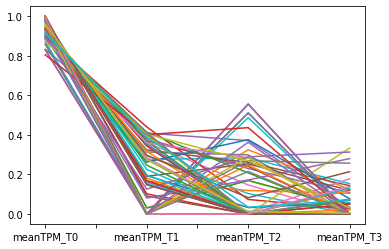

In [6]:
plot_cluster(2, svd_preds)


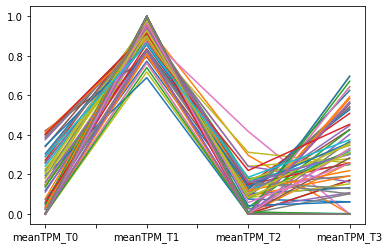

In [7]:
plot_cluster(3, svd_preds)


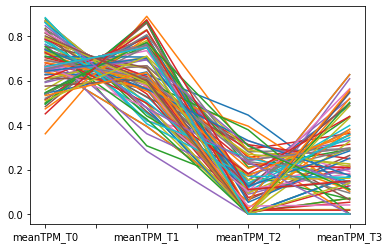

In [8]:
plot_cluster(4, svd_preds)


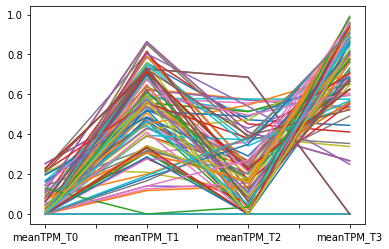

In [9]:
plot_cluster(5, svd_preds)


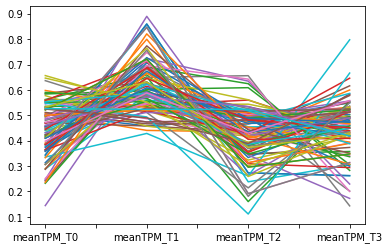

In [10]:
plot_cluster(6, svd_preds)


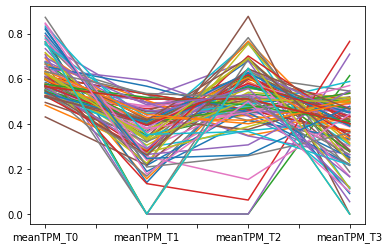

In [11]:
plot_cluster(7, svd_preds)
